# Importamos las librerias que vamos a usar

In [ ]:
# Configurar IPCompleter
%config IPCompleter.greedy=True

# Importar librerías
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
import missingno as msno
import plotly.graph_objects as go


*   **pandas** es esencial para la manipulación y análisis de datos tabulares, permitiendo la carga y visualización de datos desde un archivo Excel
*   **numpy** proporciona soporte para arreglos y matrices de gran tamaño, facilitando las operaciones matemáticas y lógicas.
*   **xlrd** se utiliza para leer datos de archivos Excel, funcionando como backend para pandas
*   Para la visualización de datos, **seaborn y matplotlib** son herramientas cruciales; seaborn crea gráficos estadísticos atractivos y matplotlib permite crear una amplia variedad de gráficos en 2D
*   **PercentFormatter de matplotlib** ayuda a formatear los ejes en porcentajes
*   **scipy** ofrece una colección de algoritmos y funciones matemáticas y estadísticas
*  **statsmodels** facilita la estimación de modelos estadísticos y pruebas.
*   Para gráficos interactivos, **plotly.express** es ideal, permitiendo visualizaciones dinámicas y exploratorias.
*   Para realizar modelado predictivo, **scikit-lear**n es esencial; esta librería proporciona herramientas para dividir los datos en conjuntos de entrenamiento y prueba y realizar tareas de machine learning
*  **missingno** es útil para identificar y entender patrones en los datos faltantes mediante visualizaciones específicas














Procedemos a cargar la base de datos

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importas los módulos necesarios para interactuar con el sistema de archivos en Google Colab y Google Drive.

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DATOSPYTHON/customer_data.xlsx")
df.shape

(100000, 12)

La ruta proporcionada (/content/drive/MyDrive/DATOSPYTHON/customer_data.xlsx) es la ubicación del archivo Excel en Google Drive. Una vez leído, los datos se almacenan en la **variable df** como un DataFrame de pandas, que permite su manipulación y análisis.

df.shape -> este atributo devuelve una tupla que indica el número de filas y columnas en el DataFrame ((número_de_filas, número_de_columnas)).

In [ ]:
df.dtypes
print('\n Los datos y sus tipos son:\n', df.dtypes)


 Los datos y sus tipos son:
 id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object


 Utilizamos df.dtypes para obtener los tipos de datos de cada columna y luego imprimimos esta información junto con un mensaje explicativo.

In [ ]:
df.head(20)

id  age  gender  income   education region loyalty_status  \
0    1   27    Male   40682    Bachelor   East           Gold   
1    2   29    Male   15317     Masters   West        Regular   
2    3   37    Male   38849    Bachelor   West         Silver   
3    4   30    Male   11568  HighSchool  South        Regular   
4    5   31  Female   46952     College  North        Regular   
5    6   38    Male    7347    Bachelor  South         Silver   
6    7   32  Female    8265    Bachelor  South         Silver   
7    8   24  Female   47773  HighSchool  North        Regular   
8    9   27    Male   19154     College   East        Regular   
9   10   28  Female   24666  HighSchool  North        Regular   
10  11   35    Male   43896  HighSchool  South        Regular   
11  12   32  Female   40044    Bachelor  North         Silver   
12  13   32    Male    6735     College   East         Silver   
13  14   30  Female   19034    Bachelor   East        Regular   
14  15   28    Male   35748    Bachelor  North         Silver   
15  16   38  Female   26282     College   West         Silver   
16  17   32    Male   49088    Bachelor  South        Regular   
17  18   21  Female   20163     College   West        Regular   
18  19   33  Female   10660    Bachelor   West        Regular   
19  20   28    Male   40725  HighSchool   East        Regular   

   purchase_frequency  purchase_amount product_category  promotion_usage  \
0            frequent            18249            Books                0   
1                rare             4557         Clothing                1   
2                rare            11822         Clothing                0   
3            frequent             4098             Food                0   
4          occasional            19685         Clothing                1   
5          occasional             2822      Electronics                0   
6            frequent             3293         Clothing                0   
7                rare            21794            Books                0   
8          occasional             5819         Clothing                0   
9                rare             8779             Food                0   
10               rare            16158             Home                1   
11               rare            13608      Electronics                0   
12         occasional             2450         Clothing                1   
13         occasional             5579            Books                1   
14               rare            12901            Books                1   
15               rare             9644         Clothing                0   
16               rare            21329         Clothing                0   
17               rare             7612             Food                0   
18               rare             3129         Clothing                0   
19               rare            12764      Electronics                1   

    satisfaction_score  
0                    6  
1                    6  
2                    6  
3                    7  
4                    5  
5                    5  
6                    7  
7                    5  
8                    5  
9                    6  
10                   6  
11                   5  
12                   5  
13                   5  
14                   3  
15                   7  
16                   5  
17                   3  
18                   6  
19                   6

Muestra las primeras 20 filas del DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


Proporciona un resumen conciso del DataFrame, incluyendo el índice, el número de entradas, el tipo de datos de cada columna, y la cantidad de valores no nulos en cada columna. Es especialmente útil para obtener una visión general de la estructura del DataFrame, detectar datos faltantes y verificar los tipos de datos de las columnas.

In [ ]:
df.describe()

id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean    50000.500000      30.003260   27516.269880      9634.790840   
std     28867.657797       4.480535   12996.782587      4799.339449   
min         1.000000      12.000000    5000.000000      1118.000000   
25%     25000.750000      27.000000   16271.750000      5583.000000   
50%     50000.500000      30.000000   27584.500000      9452.000000   
75%     75000.250000      33.000000   38747.250000     13350.000000   
max    100000.000000      49.000000   50000.000000     26204.000000   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  
max           1.000000           10.000000

Resumen Estadístico de df.describe()

    count:
        Significado: Número de valores no nulos en cada columna.
        Interpretación: Cada columna tiene 100,000 entradas válidas, lo que indica que no hay valores nulos.

    mean:
        Significado: Media aritmética de los valores en cada columna.
        Interpretación:
            id: La media del identificador es 50,000.5, lo que tiene sentido en un rango de 1 a 100,000.
            age: La edad media es 30.003.
            income: El ingreso promedio es 27,516.27.
            purchase_amount: El monto promedio de compra es 9,634.79.
            promotion_usage: La media de uso de promociones es 0.301, indicando que aproximadamente el 30.1% de los registros usan promociones.
            satisfaction_score: La puntuación de satisfacción media es 5.01.

    std (desviación estándar):
        Significado: Mide la dispersión de los valores con respecto a la media.
        Interpretación:
            id: La desviación estándar de 28,867.66 indica una amplia dispersión en los valores del identificador.
            age: La desviación estándar de 4.48 años muestra variabilidad en las edades.
            income: La desviación estándar de 12,996.78 indica una gran variabilidad en los ingresos.
            purchase_amount: La desviación estándar de 4,799.34 muestra variabilidad en los montos de compra.
            promotion_usage: La desviación estándar de 0.459 indica variabilidad en el uso de promociones.
            satisfaction_score: La desviación estándar de 1.039 muestra cierta variabilidad en las puntuaciones de satisfacción.

    min (valor mínimo):
        Significado: El valor mínimo en cada columna.
        Interpretación:
            id: El valor mínimo del identificador es 1.
            age: La edad mínima es 12 años.
            income: El ingreso mínimo es 5,000.
            purchase_amount: El monto mínimo de compra es 1,118.
            promotion_usage: El valor mínimo es 0, indicando que algunos registros no usan promociones.
            satisfaction_score: La puntuación de satisfacción mínima es 0.

    25% (percentil 25):
        Significado: El valor debajo del cual cae el 25% de los datos.
        Interpretación:
            id: El 25% de los identificadores están por debajo de 25,000.75.
            age: El 25% de las edades están por debajo de 27 años.
            income: El 25% de los ingresos están por debajo de 16,271.75.
            purchase_amount: El 25% de los montos de compra están por debajo de 5,583.
            promotion_usage: El 25% de los registros no usan promociones.
            satisfaction_score: El 25% de las puntuaciones de satisfacción están por debajo de 4.

    50% (percentil 50 o mediana):
        Significado: El valor debajo del cual cae el 50% de los datos (mediana).
        Interpretación:
            id: El 50% de los identificadores están por debajo de 50,000.5.
            age: El 50% de las edades están por debajo de 30 años.
            income: El 50% de los ingresos están por debajo de 27,584.5.
            purchase_amount: El 50% de los montos de compra están por debajo de 9,452.
            promotion_usage: El 50% de los registros no usan promociones.
            satisfaction_score: El 50% de las puntuaciones de satisfacción están por debajo de 5.

    75% (percentil 75):
        Significado: El valor debajo del cual cae el 75% de los datos.
        Interpretación:
            id: El 75% de los identificadores están por debajo de 75,000.25.
            age: El 75% de las edades están por debajo de 33 años.
            income: El 75% de los ingresos están por debajo de 38,747.25.
            purchase_amount: El 75% de los montos de compra están por debajo de 13,350.
            promotion_usage: El 75% de los registros usan promociones.
            satisfaction_score: El 75% de las puntuaciones de satisfacción están por debajo de 6.

    max (valor máximo):
        Significado: El valor máximo en cada columna.
        Interpretación:
            id: El valor máximo del identificador es 100,000.
            age: La edad máxima es 49 años.
            income: El ingreso máximo es 50,000.
            purchase_amount: El monto máximo de compra es 26,204.
            promotion_usage: El valor máximo es 1, indicando que algunos registros usan promociones.
            satisfaction_score: La puntuación de satisfacción máxima es 10.

In [ ]:
df['gender'].value_counts()

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [ ]:
df['education'].value_counts()

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [ ]:
df['region'].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [ ]:
df['loyalty_status'].value_counts()

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

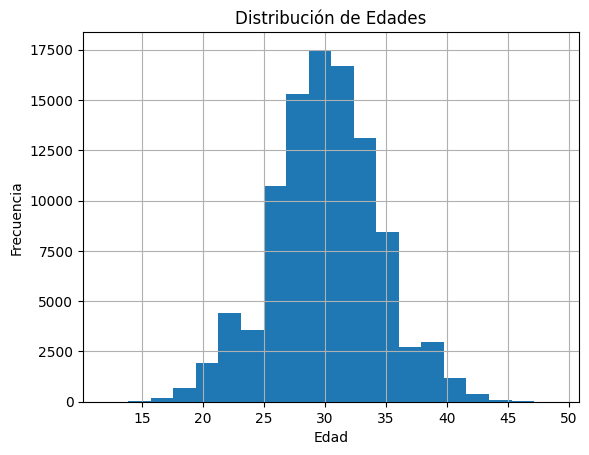

In [ ]:
df['age'].hist(bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()



  df['age']: Esto selecciona la columna 'age' del DataFrame df. Esto significa que estamos accediendo a la columna 'age' del DataFrame para realizar operaciones en ella.

  .hist(bins=20): Esto llama al método hist() en la columna 'age'. hist() es una función que crea un histograma de los datos. La opción bins=20 especifica el número de intervalos (bins) en los que se dividirá el rango de datos. En este caso, se están utilizando 20 bins para agrupar los datos de la columna 'age'.

Hstograma que muestra la distribución de las edades en el conjunto de datos, dividiéndolas en 20 intervalos.

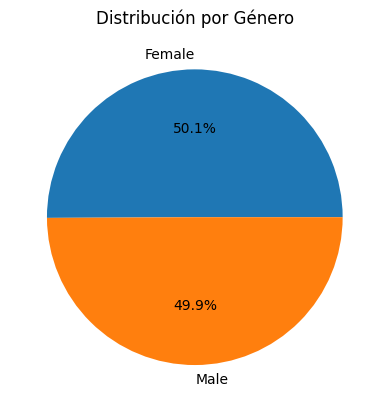

In [ ]:
gender_distribution = df['gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribución por Género')
plt.show()

gender_distribution = df['gender'].value_counts(): Esto cuenta el número de ocurrencias de cada valor único en la columna 'gender' del DataFrame df y lo almacena en la variable gender_distribution. Esto crea una Serie de Pandas donde los valores únicos son los índices y los recuentos de cada valor son los valores en la Serie.

gender_distribution.plot(kind='pie', autopct='%1.1f%%'): Aquí se utiliza el método plot() de Pandas para generar un gráfico de pastel (pie chart) de los valores en gender_distribution. El argumento kind='pie' especifica que queremos un gráfico de pastel. El argumento autopct='%1.1f%%' hace que se muestre el porcentaje de cada categoría en el gráfico de pastel.

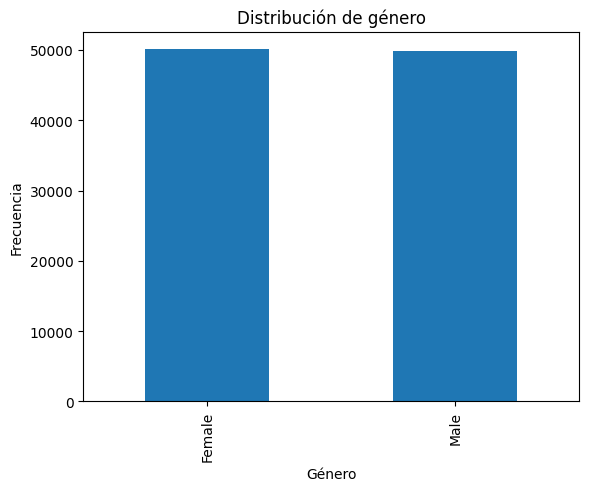

In [ ]:
gender_distribution.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de género')
plt.show()


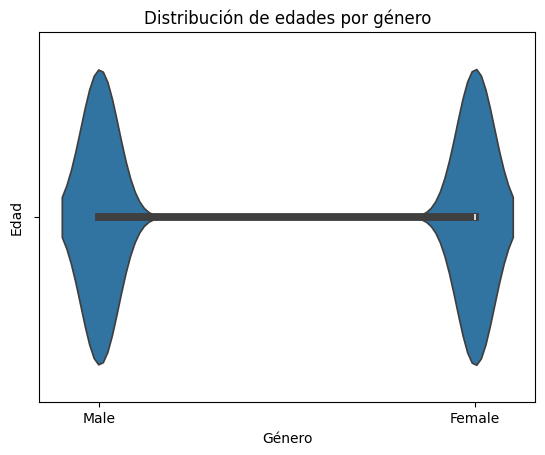

In [ ]:
sb.violinplot(x='gender', data=df)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Distribución de edades por género')
plt.show()


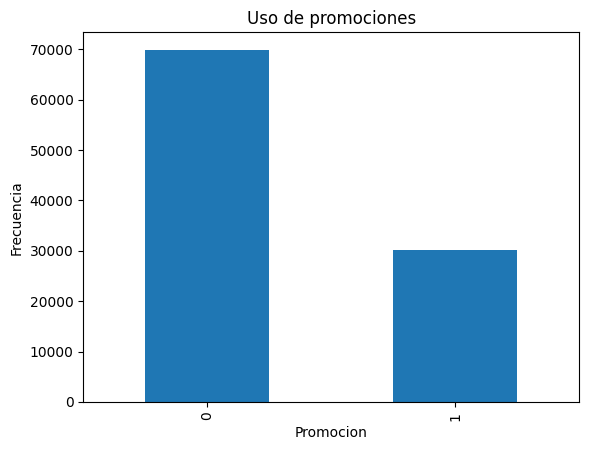

In [ ]:
promotion_usage_distribution = df['promotion_usage'].value_counts()
promotion_usage_distribution.plot(kind='bar')
plt.xlabel('Promocion')
plt.ylabel('Frecuencia')
plt.title('Uso de promociones')
plt.show()

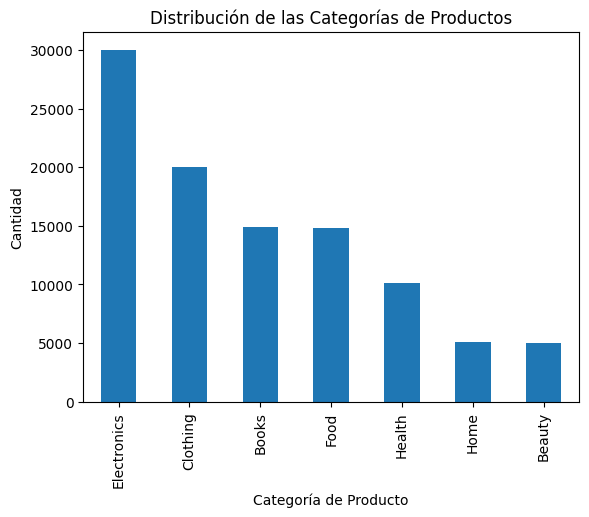

In [ ]:
category_distribution = df['product_category'].value_counts()
category_distribution.plot(kind='bar')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.title('Distribución de las Categorías de Productos')
plt.show()

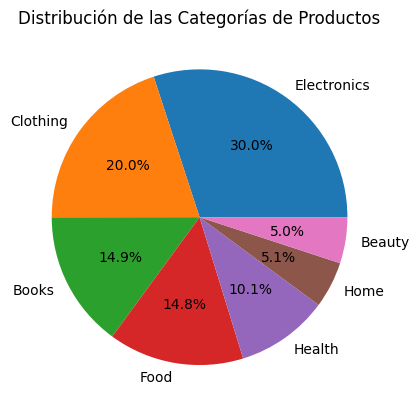

In [ ]:
category_distribution = df['product_category'].value_counts()
category_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribución de las Categorías de Productos')
plt.show()


In [ ]:
fig = px.scatter(df, x='age', y='income', color='gender', hover_data=['education'], title='Relación entre Edad e Ingreso')
fig.show()


px.scatter: Esta función de Plotly Express crea un gráfico de dispersión.

df: Es el DataFrame que contiene los datos que se utilizarán para crear el gráfico.

x='age' y y='income': Especifica las columnas del DataFrame que se utilizarán en el eje x (edad) y en el eje y (ingreso), respectivamente.

color='gender': Esta opción asigna diferentes colores a los puntos en el gráfico de dispersión según el valor de la columna 'gender' del DataFrame. Cada categoría única en la columna 'gender' se representará con un color diferente.

hover_data=['education']: Esta opción muestra información adicional cuando se pasa el cursor sobre los puntos en el gráfico. En este caso, se muestra la educación de cada individuo.

title='Relación entre Edad e Ingreso': Esta opción establece el título del gráfico.

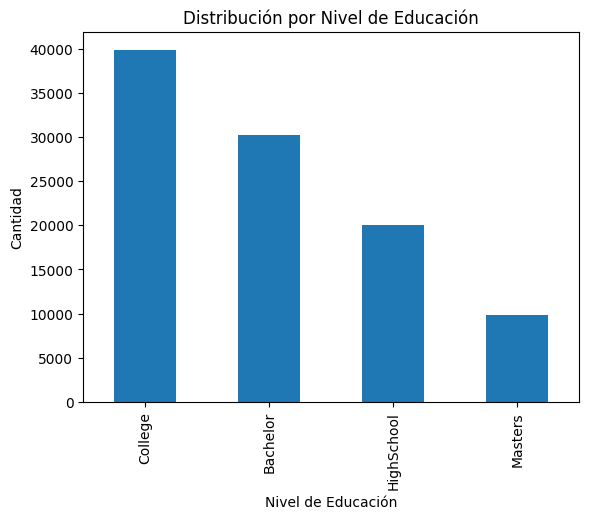

In [ ]:
education_distribution = df['education'].value_counts()
education_distribution.plot(kind='bar')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad')
plt.title('Distribución por Nivel de Educación')
plt.show()


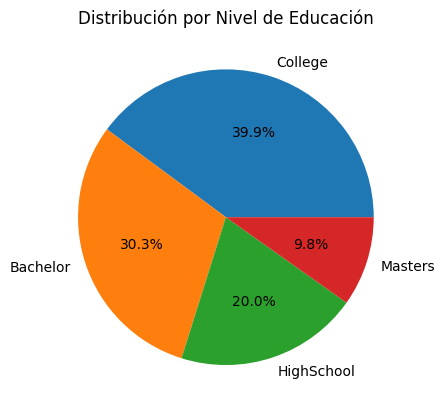

In [ ]:
education_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribución por Nivel de Educación')
plt.show()


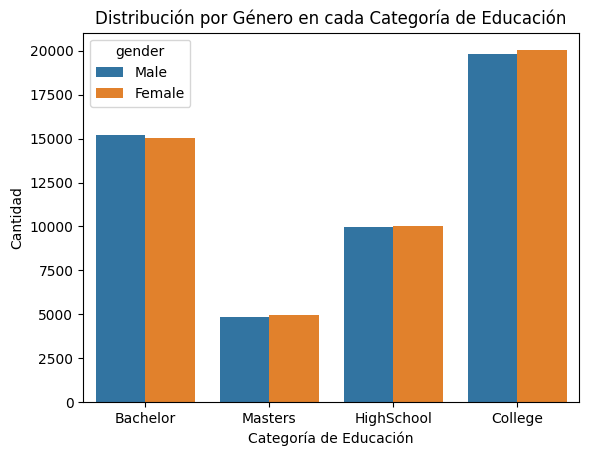

In [ ]:
# Visualizar la distribución de hombres y mujeres en cada categoría de educación
sb.countplot(x='education', hue='gender', data=df)
plt.xlabel('Categoría de Educación')
plt.ylabel('Cantidad')
plt.title('Distribución por Género en cada Categoría de Educación')
plt.show()


In [ ]:
# Calcular la cantidad de cada loyalty_status
loyalty_counts = df['loyalty_status'].value_counts()
# Crear un DataFrame para el gráfico de pastel
loyalty_data = loyalty_counts.reset_index()
loyalty_data.columns = ['loyalty_status', 'count']
# Crear un gráfico interactivo de pastel con Plotly Express
fig = px.pie(loyalty_data, names='loyalty_status', values='count',
             title='Distribución de Loyalty Status',
             labels={'loyalty_status': 'Loyalty Status', 'count': 'Cantidad'},
             hole=0.3)
fig.show()


In [ ]:
# Calcular la cantidad de hombres y mujeres en cada categoría de educación
gender_count = df.groupby(['education', 'gender']).size().unstack(fill_value=0)
# Crear un DataFrame para el gráfico de pastel
gender_count['Total'] = gender_count.sum(axis=1)
pie_data = gender_count.reset_index()
# Crear un gráfico interactivo de pastel con Plotly Express
fig = px.pie(pie_data, names='education', values='Total',
             title='Distribución por Categoría de Educación',
             labels={'education': 'Categoría de Educación', 'Total': 'Total'})
# Personalizar los datos a mostrar al pasar el cursor
fig.update_traces(textinfo='percent+label',
                  hovertemplate='Categoría de Educación: %{label}<br>Total: %{value}<br>Hombres y Mujeres: %{customdata[0]}')
# Añadir los datos personalizados para hover
fig.data[0].customdata = pie_data[['Male', 'Female']].values
# Mostrar el gráfico
fig.show()


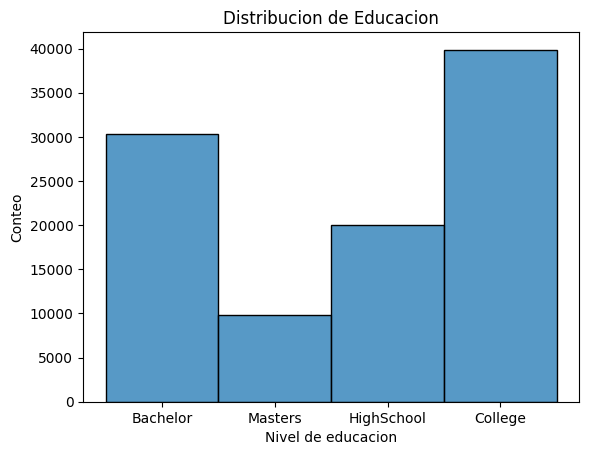

In [ ]:
plt.figure()
plt.title('Distribucion de Educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Conteo')
sb.histplot(df['education'])
plt.show()

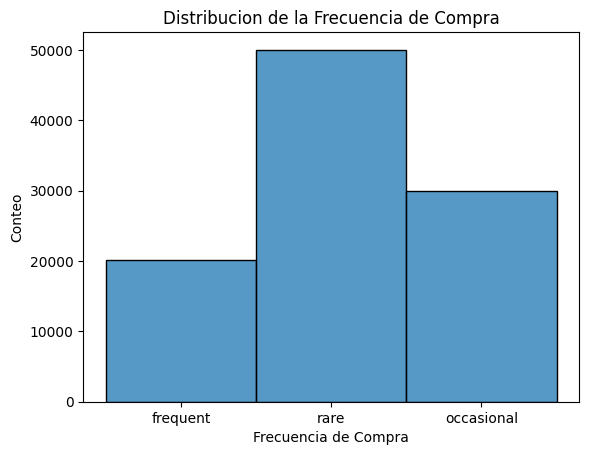

In [ ]:
plt.figure()
plt.title('Distribucion de la Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Conteo')
sb.histplot(df['purchase_frequency'])
plt.show()

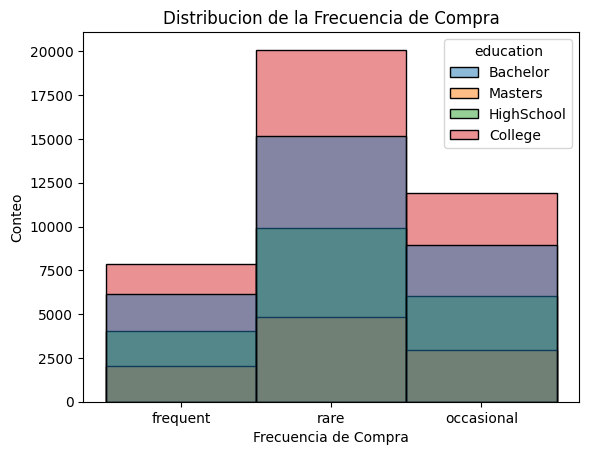

In [ ]:
plt.figure()
sb.histplot(data=df, x='purchase_frequency', hue='education')
plt.title('Distribucion de la Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Conteo')
plt.show()

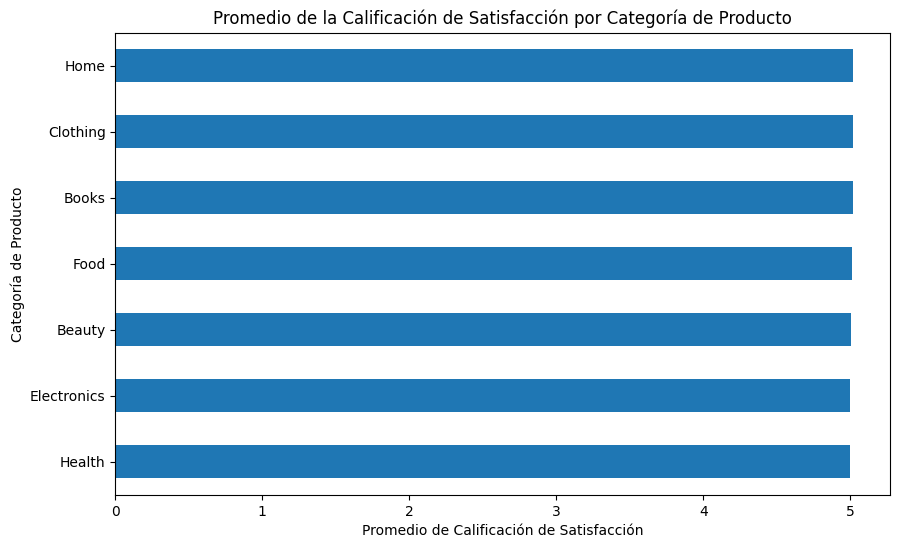

In [ ]:
#Promedio de la Calificación de Satisfacción por Categoría de Producto
# Calcular el promedio de la calificación de satisfacción por categoría de producto
avg_satisfaction_by_category = df.groupby('product_category')['satisfaction_score'].mean().sort_values()

# Crear un gráfico de barras horizontales para el promedio de la calificación de satisfacción por categoría de producto
plt.figure(figsize=(10, 6))
avg_satisfaction_by_category.plot(kind='barh')
plt.xlabel('Promedio de Calificación de Satisfacción')
plt.ylabel('Categoría de Producto')
plt.title('Promedio de la Calificación de Satisfacción por Categoría de Producto')
plt.show()


In [ ]:
fig = px.box(df, x='product_category', y='satisfaction_score',
             title='Calificación de Satisfacción por Categoría de Producto',
             labels={'product_category': 'Categoría de Producto', 'satisfaction_score': 'Calificación de Satisfacción'})
fig.update_layout(xaxis_title='Categoría de Producto', yaxis_title='Calificación de Satisfacción')
fig.show()

In [ ]:
# Calcular la cantidad de cada región
region_counts = df['region'].value_counts()
# Crear un DataFrame para el gráfico de pastel
region_data = region_counts.reset_index()
region_data.columns = ['region', 'count']
# Crear un gráfico interactivo de pastel con Plotly Express
fig = px.pie(region_data, names='region', values='count',
             title='Distribución por Región',
             labels={'region': 'Región', 'count': 'Cantidad'},
             hole=0.3)
fig.show()


In [ ]:
# Ordenar el DataFrame por ingresos de forma descendente y seleccionar las primeras 10 filas
top_10_incomes = df.sort_values(by='income', ascending=False).head(10)
top_10_incomes

id  age  gender  income   education region loyalty_status  \
93803  93804   34    Male   50000     Masters   East        Regular   
70108  70109   31    Male   49999    Bachelor  South         Silver   
58036  58037   30  Female   49998    Bachelor   West           Gold   
36757  36758   20    Male   49997     College   West        Regular   
23610  23611   38  Female   49997     Masters  South         Silver   
56201  56202   31  Female   49996     College  North        Regular   
39256  39257   31  Female   49995    Bachelor   West        Regular   
79719  79720   28    Male   49995  HighSchool   West         Silver   
89897  89898   31    Male   49994     College  South         Silver   
53649  53650   32    Male   49994    Bachelor  North        Regular   

      purchase_frequency  purchase_amount product_category promotion_usage  \
93803         occasional            16837            Books              No   
70108         occasional            11518      Electronics              No   
58036               rare            15721             Food              Sí   
36757               rare            17770             Food              Sí   
23610               rare            16323           Beauty              No   
56201               rare            18403             Food              No   
39256         occasional            20892             Food              No   
79719           frequent            21225             Home              No   
89897         occasional            19300             Food              No   
53649           frequent            18259           Beauty              No   

       satisfaction_score  
93803                   5  
70108                   5  
58036                   7  
36757                   5  
23610                   5  
56201                   7  
39256                   5  
79719                   4  
89897                   6  
53649                   5

In [ ]:
# Ordenar el DataFrame por ingresos de forma descendente y seleccionar las primeras 10 filas
top_10_incomes = df.sort_values(by='income', ascending=False).head(10)
# Crear una tabla interactiva con Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=list(top_10_incomes.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_10_incomes[col] for col in top_10_incomes.columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Top 10 Personas con Mayores Ingresos')
fig.show()


In [ ]:
# Calcular el promedio de ingresos por nivel de educación
avg_income_by_education = df.groupby('education')['income'].mean().sort_values()
avg_income_by_education


education
HighSchool    27423.473616
Masters       27470.785452
College       27544.391333
Bachelor      27555.371644
Name: income, dtype: float64

In [ ]:
fig = px.box(df, x='education', y='income',
             title='Distribución de Ingresos por Nivel de Educación',
             labels={'education': 'Nivel de Educación', 'income': 'Ingresos'})
fig.update_layout(xaxis_title='Nivel de Educación', yaxis_title='Ingresos')
fig.show()

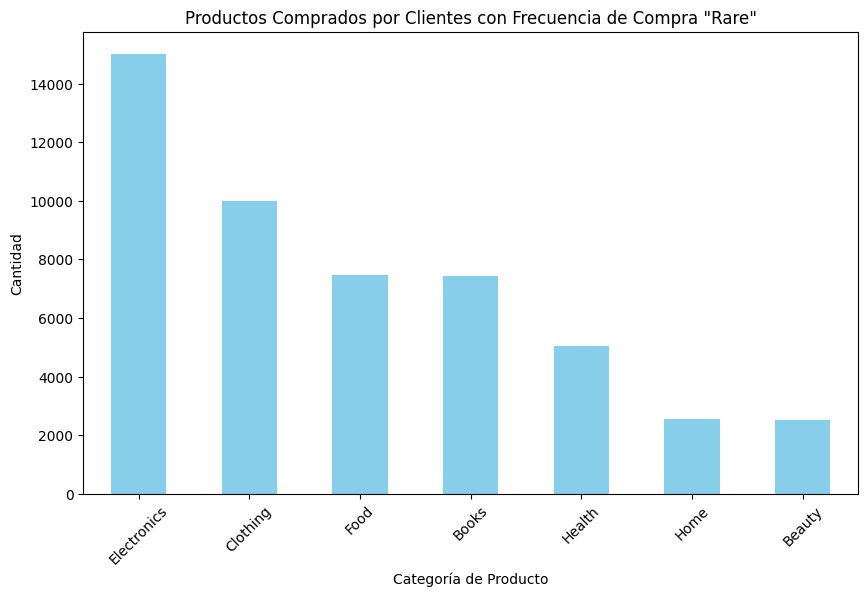

In [ ]:
# Filtrar el DataFrame para clientes con frecuencia de compra 'rare'
rare_purchases = df[df['purchase_frequency'] == 'rare']
# Contar la cantidad de productos comprados en cada categoría
product_counts = rare_purchases['product_category'].value_counts()
# Crear un gráfico de barras para visualizar las compras por categoría de producto
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.title('Productos Comprados por Clientes con Frecuencia de Compra "Rare"')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Crear un DataFrame para el gráfico interactivo
product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['product_category', 'count']
# Crear un gráfico interactivo de barras con Plotly Express
fig = px.bar(product_counts_df, x='product_category', y='count',
             title='Productos Comprados por Clientes con Frecuencia de Compra "Rare"',
             labels={'product_category': 'Categoría de Producto', 'count': 'Cantidad'},
             color='product_category')
fig.show()